# Baseline Model for Fwwdback Sentiment Analysis

The baseline model will use Multinomial Naive Bayes with Vector Count (bag of words) to classify the feedback.

# Imports and Constants

In [1]:
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
import ast

In [2]:
DATA_FILE_PATH = 'C:\\Users\\Yostina\\SentimentNLP\\'
TOKENIZED_DATA_FILE_NAME = 'sentiment_mapped_datas4.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [4]:
df.head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year,tokens,category,sentiment
0,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በአል በሰላም አደረሳችሁ፡፡,1,1,2008.0,"['ኢቲቪ', 'ሰራተኞች', 'በሙሉ', 'እንኳን', 'ለገና', 'በአል', 'በሰላም', 'አደረሳችሁ', '፡', '፡']",ETV,0
1,Debub,M,50,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,2008.0,"['መንግስት', 'በአገራችን', 'በደረሰው', 'የተለያዩ', 'ችግሮች', 'ላይ', 'እየወሰደ', 'ያለው', 'እርምጃ', 'በጣም', 'ጥሩ', 'ነው', 'በዚሁ', 'ይቀጥል', '፡', '፡']",ETV,1
2,Debub,M,50,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,2008.0,"['ኢቲቪ', 'ደግሞ', 'በዜና', 'በወቅታዊ', 'ጉዳዮች', 'ላይ', 'እውነት', 'ለመናገር', 'በጣም', 'ጥሩ', 'እየሰራችሁ', 'ነው', 'በርቱ', '፡', '፡']",ETV,1
3,Debub,M,50,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,2008.0,"['ኢቲቪ', 'ቢሰራ', 'የምንለው', 'ህዝቡ', 'ስሩን', 'የሰደደው', 'የህዋት', 'አስተዳደር', 'አሁንም', 'ባሉት', 'አመራሮች', 'እየተተገበረ', 'ስለሆነ', 'ወደታች', 'ወርዳችሁ', 'ብትሰሩ', 'የበለጠ', 'ተሰሚ', 'ትሆናለችሁ', 'አገርንም', 'በሰላም', 'ታስቀጥላላችሁ', 'ሀላፊነታችሁን', 'ተወጡ', '፡', '፡']",ETV,0
4,Debub,M,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,2008.0,"['ኢቲቪ', 'ዜና', '57', 'ላይ', 'የሚቀርቡት', 'ወቅታዊ', 'ዜናዎች', 'በሀገርና', 'በውጭ', 'በጣም', 'ጥሩ', 'መረጃ', 'እያገኝን', 'ነው', '፡', '፡']",ETV,1


In [5]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)

In [6]:
data = df[['tokens', 'category']]
     

In [7]:
data.head()

,tokens,category
0,"[ኢቲቪ, ሰራተኞች, በሙሉ, እንኳን, ለገና, በአል, በሰላም, አደረሳችሁ, ፡, ፡]",ETV
1,"[መንግስት, በአገራችን, በደረሰው, የተለያዩ, ችግሮች, ላይ, እየወሰደ, ያለው, እርምጃ, በጣም, ጥሩ, ነው, በዚሁ, ይቀጥል, ፡, ፡]",ETV
2,"[ኢቲቪ, ደግሞ, በዜና, በወቅታዊ, ጉዳዮች, ላይ, እውነት, ለመናገር, በጣም, ጥሩ, እየሰራችሁ, ነው, በርቱ, ፡, ፡]",ETV
3,"[ኢቲቪ, ቢሰራ, የምንለው, ህዝቡ, ስሩን, የሰደደው, የህዋት, አስተዳደር, አሁንም, ባሉት, አመራሮች, እየተተገበረ, ስለሆነ, ወደታች, ወርዳችሁ, ብትሰሩ, የበለጠ, ተሰሚ, ትሆናለችሁ, አገርንም, በሰላም, ታስቀጥላላችሁ, ሀላፊነታችሁን, ተወጡ, ፡, ፡]",ETV
4,"[ኢቲቪ, ዜና, 57, ላይ, የሚቀርቡት, ወቅታዊ, ዜናዎች, በሀገርና, በውጭ, በጣም, ጥሩ, መረጃ, እያገኝን, ነው, ፡, ፡]",ETV


# Split Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['category'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['category'])

In [9]:
X_train.shape

(3079,)

In [10]:
X_test.shape

(770,)

# Encode Labels

In [11]:
le = LabelEncoder()

In [12]:
y_train_enc = le.fit_transform(y_train)

In [13]:
y_test_enc = le.transform(y_test)

# Define Pipeline

In [14]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [15]:
pipeline = Pipeline([
    ('ጥሩ',CountVectorizer(preprocessor=passthrough, tokenizer=passthrough)), 
    ('classifier', MultinomialNB()), 
])

# Model

In [16]:
pipeline.fit(X_train,y_train_enc)

Pipeline(steps=[('ጥሩ',
                 CountVectorizer(preprocessor=<function passthrough at 0x00000082B4CA5E50>,
                                 tokenizer=<function passthrough at 0x00000082B4CA5E50>)),
                ('classifier', MultinomialNB())])

# Evaluate Model

Classification Report for Training Set
              precision    recall  f1-score   support

         ETV       0.99      1.00      0.99      3040
          FM       0.00      0.00      0.00         5
          NR       1.00      0.15      0.26        34

    accuracy                           0.99      3079
   macro avg       0.66      0.38      0.42      3079
weighted avg       0.99      0.99      0.98      3079



C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


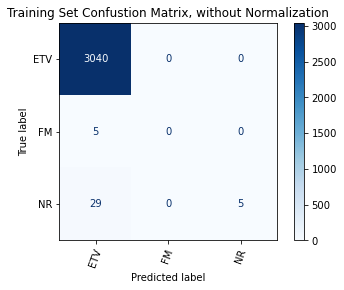

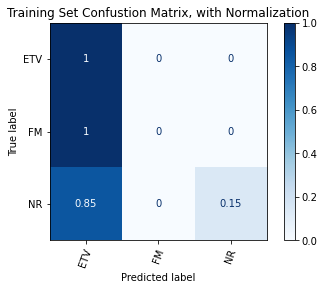

In [17]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')

Classification Report for Test Set
              precision    recall  f1-score   support

         ETV       0.99      1.00      0.99       760
          FM       0.00      0.00      0.00         1
          NR       1.00      0.22      0.36         9

    accuracy                           0.99       770
   macro avg       0.66      0.41      0.45       770
weighted avg       0.99      0.99      0.99       770



C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


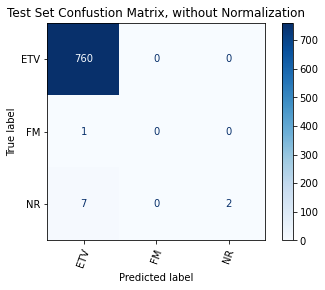

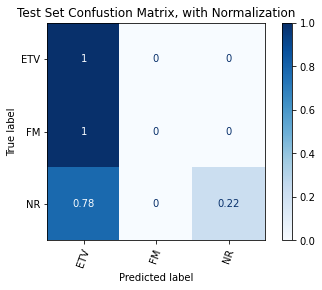

In [18]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')

In [19]:
lb = LabelBinarizer()
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc)
y_hat_test_multi = pipeline.predict_proba(X_test)

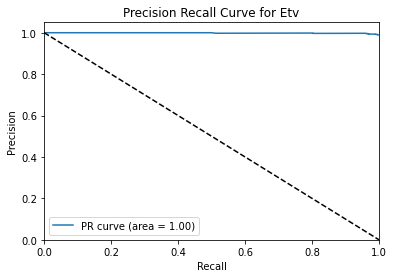

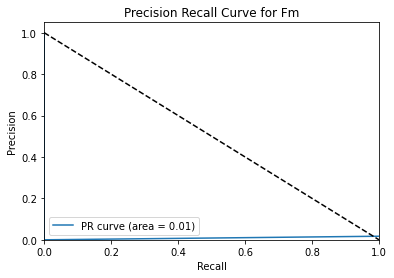

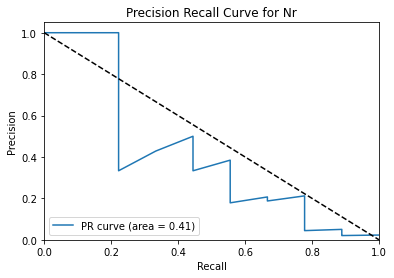

In [20]:
evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

# Summary

The accuracy for the model is 68% on the test set while being a significantly higher 82% on the training set.  The 14% difference tells me that the model is overfit on the training data.  Even so, 68% accuracy is still much better than random guessing which should give an accuracy of about 33%.

The data is highly imbalanced and the model did much better on the majority class than the two minority classes with the class with the least representation doing the worst.  
* The Negative Emotion class in the test data has an Recall of only 0.08, Positive has 0.60 and Neutral has 0.78
* The Macro Average Recall is 0.49

Significant amounts of the Negative and Positive class were classified as Neutral, while very few of the Neutral and Positive class were classified as Negative.  As is quantified with the Recall metrics, the model has a very hard time identifying what makes a feedback negative.